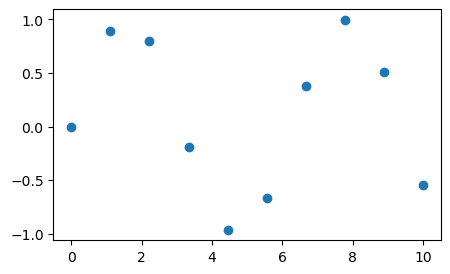

In [41]:
# création d'un dataset 
import numpy as np
import matplotlib.pyplot as plt



x = np.linspace (0,10, 10)
y = np.sin(x)
plt.figure(figsize =(5,3))
plt.scatter( x, y)

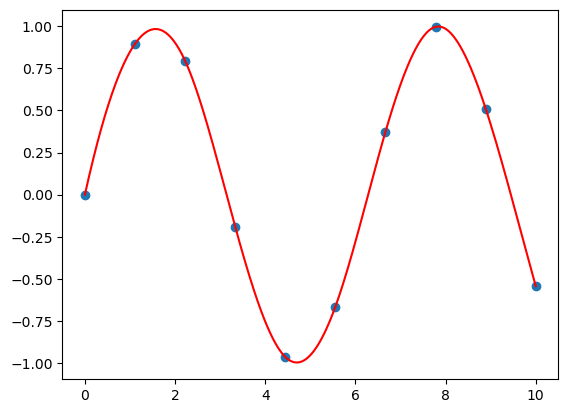

In [25]:
from scipy.interpolate import interp1d
# création de la fontion d'interpolation
f= interp1d(x, y, kind='cubic')

# resultat de l'interpolation sur les nouvelles données
new_x = np.linspace(0,10, 50) 

'''
new_x est créé pour avoir des points supplémentaires afin de tracer une courbe interpolée plus fine et continue,
ce qui donne une meilleure visualisation de la relation entre les points de départ x et y.

'''
result = f(new_x)
# visualisation avec matplotlib
plt.scatter(x,y)
plt.plot(new_x, result, c='r')


In [ ]:
# OPTIMISATION AVEC SCIPY 

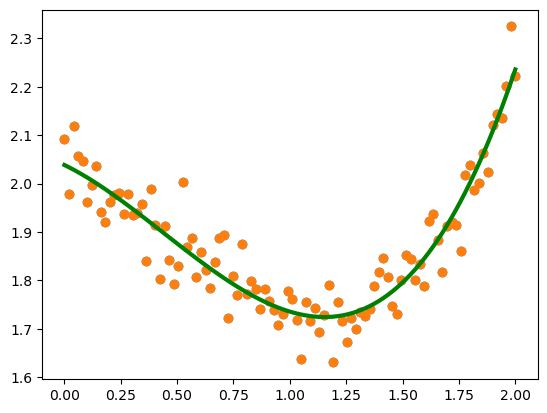

In [61]:
# Curve_fit

# création d'un dataset avec du brut "normal"
x = np.linspace(0,2, 100)
y = 1/3 * x**3 - 3/5 *x**2 + 2 + np.random.randn(x.shape[0])/20 
plt.scatter (x, y )

# Définition d'un modele statistique sensé "coller" au dataset ci-dessus
def f (x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

from scipy import optimize

# curve_fit permet de trouver les parametres du modele f grace a la méthode des moindres carrés
params, param_cov = optimize.curve_fit(f, x, y)  # params : c'est les différents paramétres de notre modéle (a,b,c,d)
    
# visualisatoin du resultat

plt.scatter( x,y)
plt.plot(x , f(x, params[0], params[1], params[2], params[3]), c='g', lw=3)




In [ ]:
# la fonction optimize.minimize est utile pour trouver un minimum local dans une fonction a N dimensions

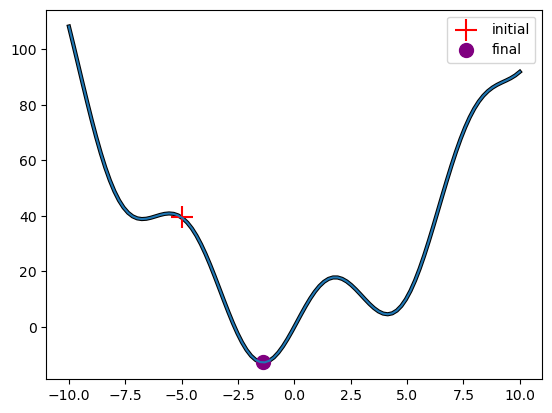

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize


# Définition d'une fonction a 1 Dimension
def g (x):
    return x**2 + 15*np.sin(x)

# Visualisation de la fonction
x = np.linspace(-10, 10, 100)
plt.plot(x, g(x))

# Définition d'un point x0 pour l'algorithme de minimisation
x0=-5
result = optimize.minimize(g, x0=x0 ).x # résultat de la minimisation

# visualisation du resultat
plt.plot (x, g(x), lw= 3, zorder= -1, c='black' )
plt.scatter (x0, g(x0),s=250, marker='+', c='r', zorder=1, label='initial') # point initial
plt.scatter(result, g(result), s=100, c='purple', zorder=1, label='final') # point final
plt.legend()
plt.show()

ValueError: 'x0' must only have one dimension.

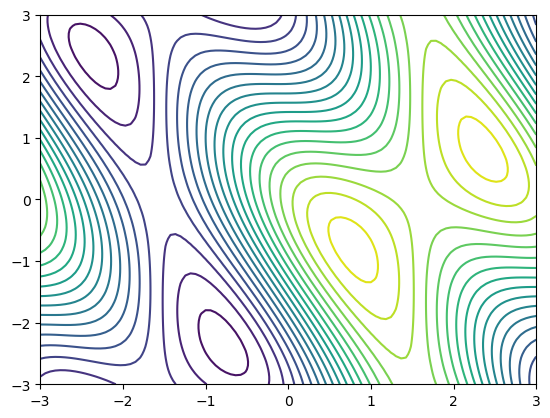

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize


# Définition d'une fonction 2D. X est un tableau numpy a 2-Dimension
def f (x):
    return np.sin(x[0]) + np.cos(x[0]+x[1])*np.cos(x[0])

# Génération de la fonction sur un espace 2D.
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)

# Visualisation de la fonction
plt.contour(x, y, f(np.array([x, y])), 20)

# Placement d'un point x0 initial aux coordonées (0,0)
x0 = np.zeros((2, 1))

# Minimisation de la fonction
result = optimize.minimize(f, x0=x0).x
print('le minimum est aux coordonées', result) # imprimer le résultat

# Visualisation du résultat
plt.contour(x, y, f(np.array([x, y])), 20) # fonction 2D
plt.scatter(x0[0], x0[1], marker='+', c='r', s=100, label='initial') # Point de départ
plt.scatter(result[0], result[1], c='g', s=100, label='final') # Point final
plt.legend()
plt.show()

In [ ]:
'''
TRAITEMENT DE SIGNAL : 
fonction signal.detrend est parfaite pour éliminer une tendance linéaire dans un signal. Utile pour beaucoup d'applications !
Le module scipy.fftpack contient des fonctions tres puissantes et simples d'utilisation pour effectuer des transformations de Fourier
'''

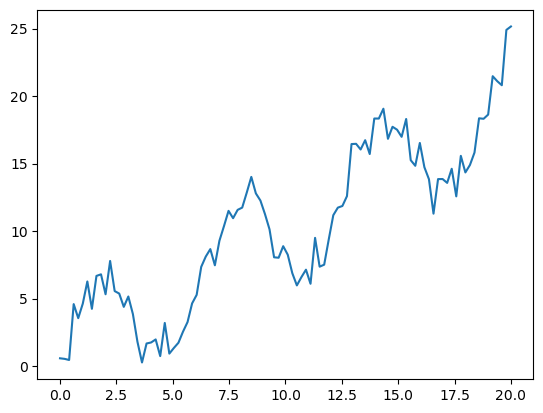

In [117]:
# Création d'un Dataset avec une tendance linéaire
x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x) +np.random.randn(x.shape[0])
plt.plot(x, y)

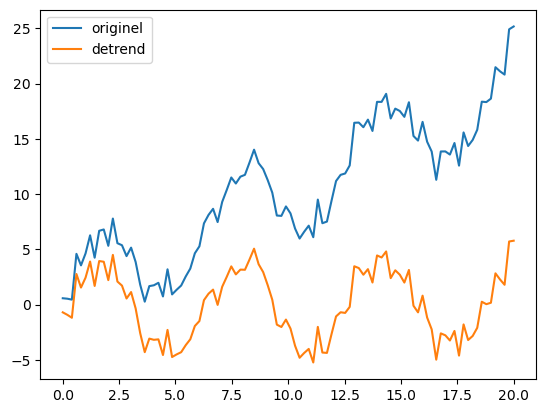

In [119]:
from scipy import signal

# Élimination de la tendance linéaire
new_y = signal.detrend(y)

# Visualisation des résultats
plt.plot(x, y, label='originel')
plt.plot(x, new_y, label='detrend')
plt.legend()
plt.show()

In [ ]:
'''  FFT
La transformation de Fourier permet d'analyser les fréquences qui composent un signal périodique (qui se répete avec le temps).
Cette opération produit un graphique que l'on appelle Spectre.
Une fois le Spectre généré, il est possible de filtrer les bruits indésirables
ou bien de sélectionner seulement certaines fréquences, ou d'en atténuer d'autres... les possibilités sont infinies.
'''


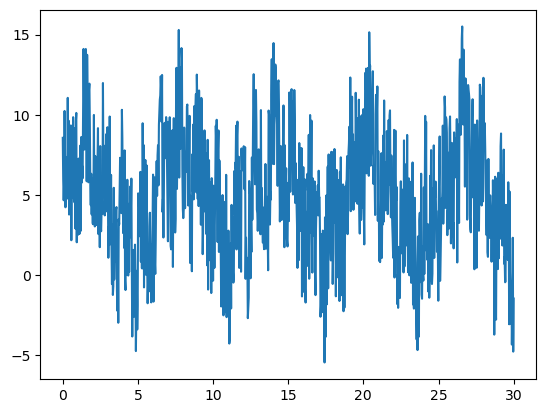

In [121]:
# Création d'un signal périodique noyé dans du bruit.
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x, y)


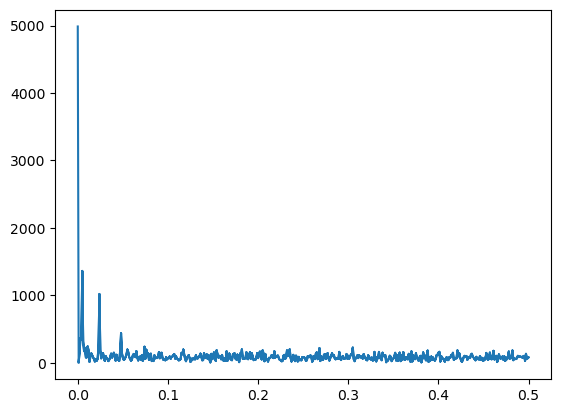

In [149]:
from scipy import fftpack

# création des variables Fourier et Fréquences, qui permettent de construire le spectre du signal.
fourier = fftpack.fft(y)
power = np.abs(fourier) # la variable power est créée pour éiminer les amplitudes négatives
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)



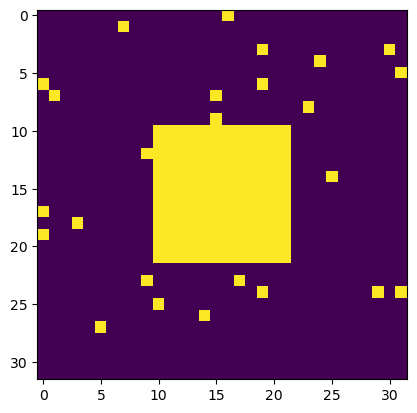

In [165]:
# IMAGE PROCESSING 

from scipy import ndimage

np.random.seed(0)
x= np.zeros((32,32))
x[10:-10, 10:-10] = 1
x[np.random.randint(0,32,30),np.random.randint(0,32,30)] = 1 #ajout d'artefacts aléatoires
plt.imshow(x)

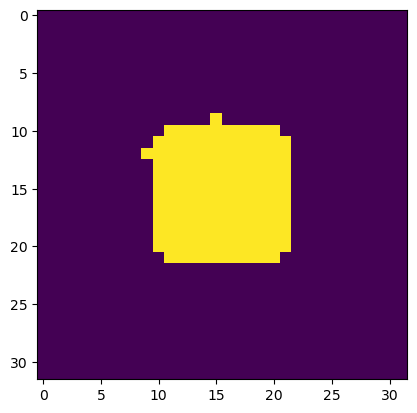

In [169]:
''' 
de dilation: imprime des pixels
d'érosion : efface des pixels
'''
# opération de binary_opening = érosion puis dilation
open_X = ndimage.binary_opening(x)
plt.imshow(open_X)

(507, 537)

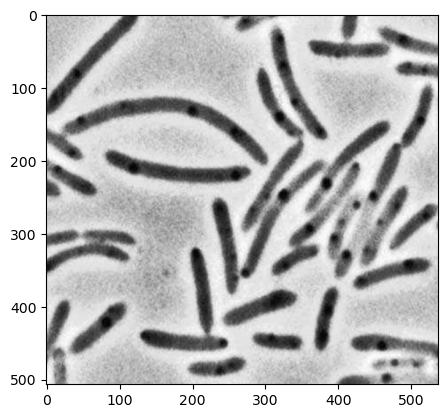

In [189]:
# importer l'image avec pyplot
image = plt.imread('bacteria.png')
image = image[:,:,0] # réduire l'image en 2D
plt.imshow(image, cmap='gray') # afficher l'image
image.shape

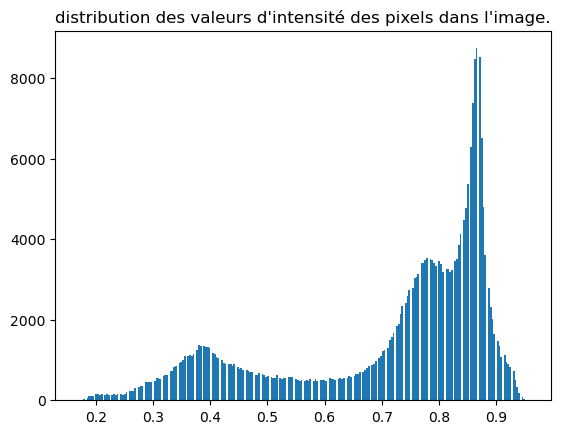

In [193]:

# copy de l'image, puis création d'un histogramme
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.title("distribution des valeurs d'intensité des pixels dans l'image.")
plt.show()


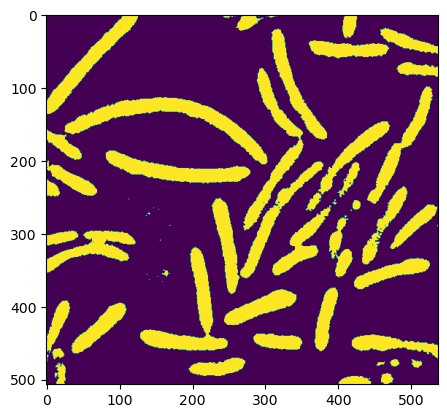

In [195]:
# boolean indexing: création d'une image binaire
image= image<0.6
plt.imshow(image)

il y a 53 groupes


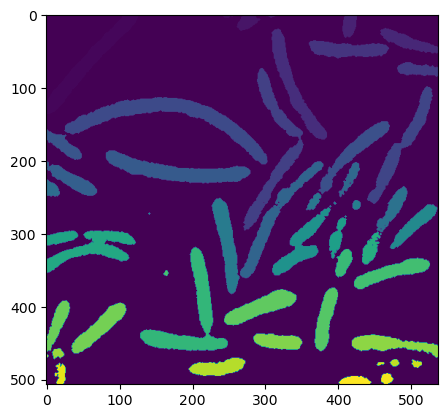

In [199]:
# morphologie utilisée pour enlever les artefacts
open_image = ndimage.binary_opening(image)
plt.imshow(open_image)

# Segmentation de l'image: label_image contient les différents labels et n_labels est le nombre de labels
label_image, n_labels = ndimage.label(open_image)
print(f'il y a {n_labels} groupes')

# Visualisation de l'image étiquetée
plt.imshow(label_image)